# Decision Tree

Reference 
https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/







The Gini index is the name of the cost function used to evaluate splits in the dataset.


In [ ]:
# gini = (1 - sum(proportion * proportion))*(group_size/total_samples)

In [ ]:
import numpy as np

Generate a 2d classification dataset

In [ ]:
# generate 2d classification dataset
from sklearn.datasets import make_blobs
import pandas as pd
from matplotlib import pyplot
X, y = make_blobs(n_samples=100, centers=2, n_features=2,cluster_std = 2, random_state=2)

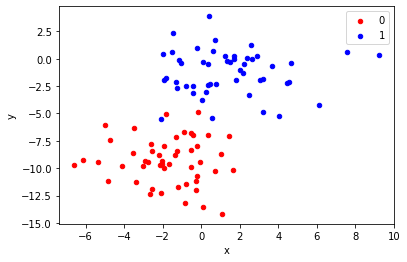

In [ ]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
y.reshape(-1,1).shape
y = y.reshape(-1,1)

In [ ]:
data = np.concatenate((X,y),axis=1)

In [ ]:
data.shape

(100, 3)

First step of decision tree is to split the dataset.

In [ ]:
left = list()
right = list()
for idx, row in enumerate(data):
  if row[1] < -5:
    left.append(row)
  else:
    right.append(row)


A function to calculate the gini of the split.

In [ ]:
def gini2(groups, classes):
  N = float(sum([len(group) for group in groups]))
  gini = 0.0
  for group in groups:
    size = float(len(group))
    if size == 0:
      continue
    score = 0.0
    for classval in classes:
      p = [row[-1] for row in group].count(classval)/size
      score += p*p
    gini += (1.0 - score)*(size/N)
  return gini

In [ ]:
gini2([left, right], [0,1])

0.07612179487179488

The split_data splits the dataset.

In [ ]:
def split_data(index, value, dataset):
  left = list()
  right = list()
  for row in dataset:
    if row[index] < value:
      left.append(row)
    else:
      right.append(row)
  return left, right

In [ ]:
teste = split_data(1, -5, data)

In [ ]:
gini2(teste, [0,1])

0.07612179487179488

The function get_split will automactilly find the best split based on the Gini score

In [ ]:
def get_split(dataset):
  classvalues = list(set(row[-1] for row in dataset))
  #if len(classvalues) == 1:
  #  empty = list()
  #  return{'gini':0, 'groups': (empty, dataset)}
  b_index, b_value, b_score, b_groups = 999,999,999, None
  for index in range(len(dataset[0]) - 1):
    for row in dataset:
      groups = split_data(index, row[index], dataset)
      gini = gini2(groups, classvalues)
      #print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
      if gini < b_score:
        b_index, b_value, b_score, b_groups = index, row[index], gini, groups
  return{'index':b_index, 'value':b_value, 'groups':b_groups}

Testing on the data set.

In [ ]:
testree = get_split(data)

In [ ]:
print('Split: [X%d < %.3f]' % ((testree['index']+1), testree['value']))

Split: [X2 < -5.459]


[]

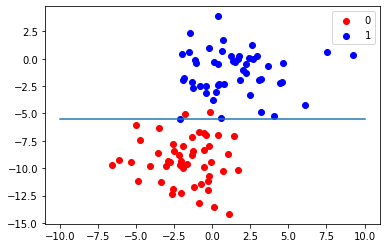

In [ ]:
# scatter plot, dots colored by class value
import matplotlib.pyplot as plt
df.head(2)
plt.scatter(df[df['label'] == 0]['x'],df[df['label'] == 0]['y'], label = '0', color = 'red')
plt.scatter(df[df['label'] == 1]['x'],df[df['label'] == 1]['y'], label = '1', color = 'blue')
plt.plot([-10,10],[testree['value'], testree['value']])
plt.legend()
plt.plot()

In [ ]:
left, right = testree['groups']

In [ ]:
classvalues = list(set(row[-1] for row in left))
classvalues

[0.0]

In [ ]:
classvalues = list(set(row[-1] for row in right))
classvalues

[0.0, 1.0]

The split function checks the depth and other hyperparameters of the tree. 

In [ ]:
def split(node, max_depth, min_size, depth):
  left, right = node['groups']
  classvaluesleft = list(set(row[-1] for row in left))
  classvaluesright = list(set(row[-1] for row in right))
  del(node['groups'])
  # check for a no split
  if not left or not right:
    node['left'] = node['right'] = to_terminal(left + right)
    return
	# check for max depth
  if depth >= max_depth:
    node['left'], node['right'] = to_terminal(left), to_terminal(right)
    return
  if len(classvaluesleft) == 1:
    node['left'] = to_terminal(left)
  elif len(left) <= min_size:
    node['left'] = to_terminal(left)
  else:
    node['left'] = get_split(left)
    split(node['left'], max_depth, min_size, depth + 1)
  if len(classvaluesright) == 1:
    node['right'] = to_terminal(right)
  elif len(right) <= min_size:
    node['right'] = to_terminal(right)
  else:
    node['right'] = get_split(right)
    split(node['right'], max_depth, min_size, depth + 1)
  



In [ ]:
def to_terminal(group):
  outcomes = [row[-1] for row in group]
  return max(set(outcomes), key = outcomes.count)

The function build_tree actually build the tree.

In [ ]:
def build_tree(train, max_depth, min_size):
  root = get_split(train)
  split(root, max_depth, min_size, 1)
  return root

In [ ]:
build_tree(data, 3, 2)

{'index': 1,
 'left': 0.0,
 'right': {'index': 1,
  'left': {'index': 1, 'left': 1.0, 'right': 0.0, 'value': -5.018741785668965},
  'right': 1.0,
  'value': -4.8233876041859745},
 'value': -5.458856019124362}

In [ ]:
def print_tree(node, depth = 0):
  if isinstance(node, dict):
    print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
    print_tree(node['left'], depth+1)
    print_tree(node['right'], depth+1)
  else:
    print('%s[%s]' % ((depth*' ', node)))

In [ ]:
tree = build_tree(data, 3, 2)
print_tree(tree)

[X2 < -5.459]
 [0.0]
 [X2 < -4.823]
  [X2 < -5.019]
   [1.0]
   [0.0]
  [1.0]


In [ ]:
def predict(node, row):
  if row[node['index']] < node['value']:
    if isinstance(node['left'], dict):
      return predict(node['left'], row)
    else:
      return node['left']
  else:
    if isinstance(node['right'], dict):
      return predict(node['right'], row)
    else:
      return node['right']



In [ ]:
predict(tree, [0, - 2])

1.0

## Testing in a dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/scratch/data.csv")

In [ ]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [ ]:
diagnosis_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diagnosis_map)

In [ ]:
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
y =data['diagnosis'].values
X = data.iloc[:,1:].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = y_train.reshape(-1,1)

In [ ]:
data = np.concatenate((X_train,y_train),axis=1)

In [ ]:
tree = build_tree(data, 8, 2)

In [ ]:
print_tree(tree)

[X8 < 0.052]
 [X21 < 16.890]
  [X11 < 0.645]
   [X25 < 0.178]
    [X15 < 0.003]
     [X2 < 21.580]
      [0.0]
      [1.0]
     [X22 < 33.370]
      [0.0]
      [X22 < 33.750]
       [1.0]
       [0.0]
    [1.0]
   [X5 < 0.094]
    [0.0]
    [1.0]
  [X2 < 16.680]
   [0.0]
   [X18 < 0.010]
    [1.0]
    [0.0]
 [X28 < 0.147]
  [X23 < 116.200]
   [X2 < 21.350]
    [0.0]
    [1.0]
   [1.0]
  [X17 < 0.143]
   [1.0]
   [0.0]


In [ ]:
X_test[0]

array([1.247e+01, 1.860e+01, 8.109e+01, 4.819e+02, 9.965e-02, 1.058e-01,
       8.005e-02, 3.821e-02, 1.925e-01, 6.373e-02, 3.961e-01, 1.044e+00,
       2.497e+00, 3.029e+01, 6.953e-03, 1.911e-02, 2.701e-02, 1.037e-02,
       1.782e-02, 3.586e-03, 1.497e+01, 2.464e+01, 9.605e+01, 6.779e+02,
       1.426e-01, 2.378e-01, 2.671e-01, 1.015e-01, 3.014e-01, 8.750e-02])

In [ ]:
predict(tree, X_test[0])

0.0

In [ ]:
y_test[0]

0

In [ ]:
y_predict = list()
for row in X_test:
  y_predict.append(predict(tree, row))


In [ ]:
y_predict = np.array([y_predict])

In [ ]:
y_predict = y_predict.reshape(114,)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
accuracy = accuracy_score(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
print(cm)
accuracy

[[67  4]
 [ 3 40]]


0.9385964912280702

I compare with the sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth = 8)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy

[[67  4]
 [ 3 40]]


0.9385964912280702